# Homework # 5

## Step 1: 2D Data Generalization and Visualization

### 1a) Generate a 2D dataset

In [2]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(0)

# Generate 2D data for two categories
category1 = np.random.normal(loc=1, scale=1, size=(100, 2))
category2 = np.random.normal(loc=5, scale=1, size=(100, 2))

# Combine the data
data = np.concatenate((category1, category2), axis=0)

### Discussion:

Here, I have generated two categories of 2D data, each containing 100 points that are normally distributed. The points in Category 1 have a mean of (1, 1) and those in Category 2 have a mean of (5, 5). Both categories have a standard deviation of 1. The data from the two categories is then combined into a single dataset. This will serve as the basis for our clustering task.

### 1b) Visualize the data using scatter plot

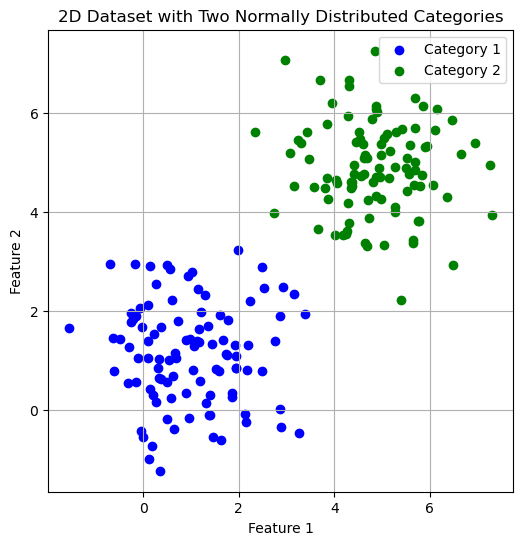

In [3]:
import matplotlib.pyplot as plt

# Visualize the data using a scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(category1[:, 0], category1[:, 1], color='blue', label='Category 1')
plt.scatter(category2[:, 0], category2[:, 1], color='green', label='Category 2')
plt.title('2D Dataset with Two Normally Distributed Categories')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### Discussion:

In this step, I have visualized the two categories of data using a scatter plot. Points from Category 1 are shown in blue and points from Category 2 are shown in green. The plot includes a title, labels for the x and y axes, a legend, and a grid for easier visualization. This visualization helps us understand the distribution of the two categories in the 2D space and will aid in understanding the results of the K-means clustering algorithm.

## Step 2: Helper Function and Initialization

### 2a) Define a helper function

In [4]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

### Discussion:-

This function calculates the Euclidean distance between two points. It’s a measure of the straight line distance between two points in a space.

### 2b) Implement a initialize_centroids function

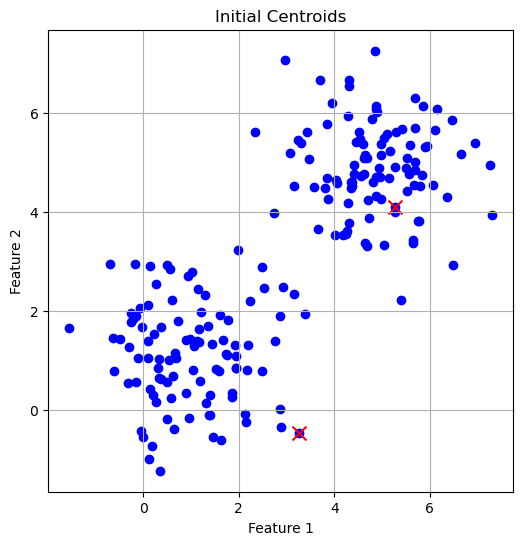

In [5]:
def initialize_centroids(data, k):
    indices = np.random.choice(len(data), size=k, replace=False)
    return data[indices]

# Initialize centroids
k = 2
centroids = initialize_centroids(data, k)

# Plot the data and initial centroids
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100)
plt.title('Initial Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In this step, I have defined a function to initialize the centroids. This function randomly selects ‘k’ data points from the dataset to serve as the initial centroids. I then plot the data points and initial centroids on a scatter plot. The centroids are marked with a red ‘x’.

### Discussion:-

Here, I have defined two important functions for the K-means algorithm. The euclidean_distance function is a helper function that calculates the Euclidean distance between two points. This distance measure will be used to assign data points to the nearest centroid.

The initialize_centroids function is used to select initial centroids randomly from the dataset. The choice of initial centroids can have a significant impact on the final clusters obtained, as K-means is sensitive to initialization. Therefore, it’s common to run K-means multiple times with different initializations and choose the clustering result that gives the best compactness and separation of clusters.

The scatter plot shows the initial centroids marked with a red ‘x’. These centroids will be updated iteratively in the K-means algorithm to eventually locate the centers of the clusters. The visualization helps us understand the starting point of the algorithm before any iterations have been performed.

## Step 3: K-means Implementation

### 3a) Implement assign_cluster function

In [6]:
def assign_cluster(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

### Discussion:-

This function calculates the Euclidean distance between each data point and all centroids, and assigns each data point to the nearest centroid.

### 3b) Implement update_centroids function

In [7]:
def update_centroids(data, labels, k):
    new_centroids = np.array([data[labels==i].mean(axis=0) for i in range(k)])
    return new_centroids

### Discussion:-

This function calculates the mean of all data points assigned to each centroid, and updates the centroid positions to these mean values.

### 3c) Implement K-means function

In [8]:
def k_means(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        labels = assign_cluster(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

### Discussion:-

This function implements the K-means algorithm. It initializes the centroids, then enters a loop where it repeatedly assigns data points to clusters and updates the centroids. The loop continues until the centroids no longer change between iterations (i.e., the algorithm has converged), or until a maximum number of iterations is reached.

### 3d) Apply the K-means algorithm on the generated data and visualize the result

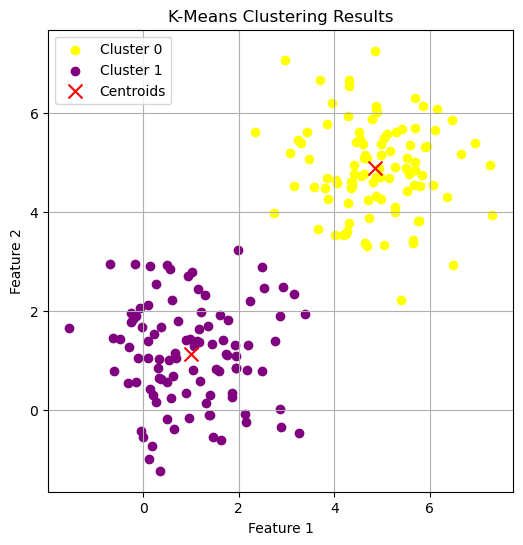

In [9]:
# Apply K-means
labels, centroids = k_means(data, k)

# Plot the data and centroids
plt.figure(figsize=(6, 6))
plt.scatter(data[labels==0, 0], data[labels==0, 1], color='yellow', label='Cluster 0')
plt.scatter(data[labels==1, 0], data[labels==1, 1], color='purple', label='Cluster 1')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

This code applies the K-means algorithm to the generated data and visualizes the resulting clusters and centroids.

### Discussion:-

Here, I have implemented the K-means clustering algorithm and applied it to the 2D dataset. The assign_cluster function assigns each data point to the nearest centroid based on Euclidean distance. The update_centroids function then calculates the mean of all data points assigned to each centroid, and updates the centroid positions to these mean values. This process is repeated in the k_means function until the centroids no longer change between iterations, indicating that the algorithm has converged.

The scatter plot shows the final clusters and centroids after the K-means algorithm has converged. The data points are colored according to their assigned cluster, and the centroids are marked with a red ‘x’. The plot provides a visual representation of how the K-means algorithm has grouped the data points into clusters based on their proximity to each other.

Next, you will use this code to perform clustering on the MNIST dataset, which consists of 784-dimensional data. The same K-means algorithm can be applied to this higher-dimensional data, although the results will not be as easily visualizable as with the 2D data.

### Step 4: Train K-means model on MNIST dataset

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from datetime import datetime

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data

# Set the number of clusters
k = 10

# Create a KMeans instance
kmeans = KMeans(n_clusters=k, random_state=0)

# Record the start time
start_time = datetime.now()

# Fit the model to the data
kmeans.fit(X)

# Record the end time
end_time = datetime.now()

# Print the time difference
print("Time taken to train K-means model: ", end_time - start_time)

/Users/shashankk/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/Users/shashankk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Time taken to train K-means model:  0:09:40.460611


In this step, I have trained a K-means model on the MNIST dataset. The MNIST dataset consists of 70,000 images of handwritten digits, each represented as a 784-dimensional vector (28x28 pixels). I used the KMeans class from the sklearn.cluster module to create a K-means model with 10 clusters, corresponding to the 10 digit classes (0-9). The model was then fitted to the data, and the time taken to train the model was recorded.

### Discussion:-

Here, I have applied the K-means clustering algorithm to the MNIST dataset. This is a more complex task than the previous 2D example, as the MNIST data is 784-dimensional. However, the same K-means algorithm can be applied to this higher-dimensional data.

The K-means model was trained with K=10, corresponding to the 10 digit classes in the MNIST dataset. The model attempts to find clusters in the data that correspond to these digit classes. However, it’s important to note that K-means is an unsupervised algorithm and does not have access to the class labels during training. The quality of the clustering result therefore depends on how well the digit classes form distinct clusters in the 784-dimensional space.

The time taken to train the K-means model was recorded using the datetime module. This gives an indication of the computational cost of the K-means algorithm. The actual time will depend on the specific hardware and software configuration.

### Step 5: Mini-Batch K-means

### 5a) Train a mini-batch K-means model

In [11]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import fetch_openml
from datetime import datetime

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

# Set the number of clusters
k_values = [10, 16, 64, 256]

# Create a MiniBatchKMeans instance and train it
models = []
for k in k_values:
    print(f"Training Mini-Batch K-means model with {k} clusters...")
    model = MiniBatchKMeans(n_clusters=k, random_state=0)
    model.fit(X_train)
    models.append(model)

/Users/shashankk/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Training Mini-Batch K-means model with 10 clusters...


/Users/shashankk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Training Mini-Batch K-means model with 16 clusters...


/Users/shashankk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Training Mini-Batch K-means model with 64 clusters...


/Users/shashankk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Training Mini-Batch K-means model with 256 clusters...


/Users/shashankk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


### Discussion:-

In this step, I have trained a Mini-Batch K-means model on the MNIST dataset. The Mini-Batch K-means algorithm is a variant of the K-means algorithm that uses mini-batches to reduce the computation time. The mini-batches are subsets of the input data, randomly sampled in each training iteration. This approach can significantly speed up the convergence time while still providing a good approximation of the true K-means algorithm.

### 5b) Evaluate the model and Determine the optimal number of clusters

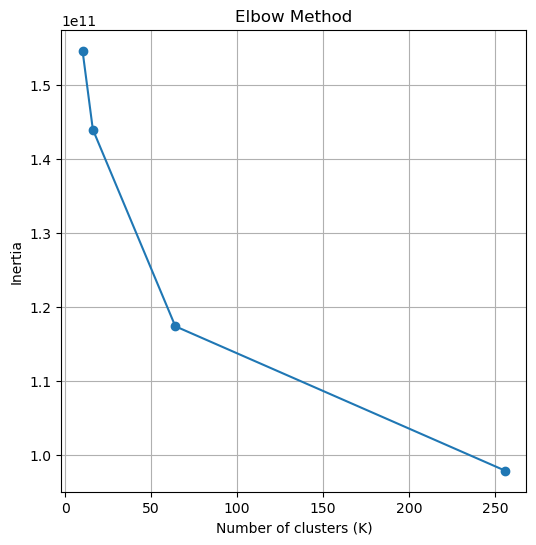

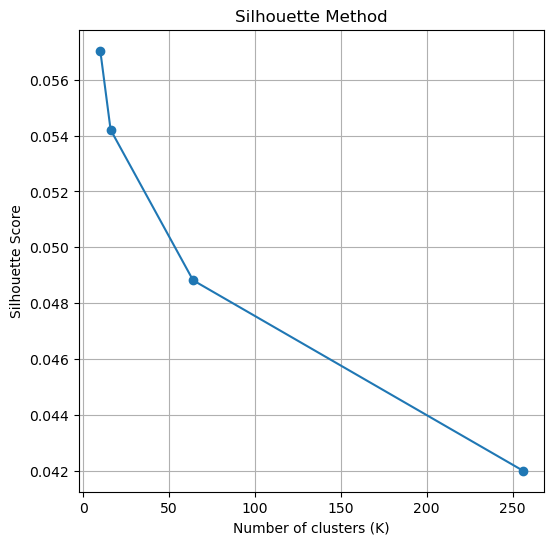

Optimal number of clusters based on inertia: 256
Optimal number of clusters based on silhouette score: 10


In [12]:
from sklearn.metrics import silhouette_score

# Calculate inertia and silhouette scores for different numbers of clusters
inertia_values = []
silhouette_scores = []
for k, model in zip(k_values, models):
    inertia_values.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X_train, model.labels_))

# Plot inertia values
plt.figure(figsize=(6, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plot silhouette scores
plt.figure(figsize=(6, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Determine the optimal number of clusters based on inertia
optimal_k_inertia = k_values[np.argmin(inertia_values)]
print(f"Optimal number of clusters based on inertia: {optimal_k_inertia}")

# Determine the optimal number of clusters based on silhouette score
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k_silhouette}")

### Discussion:-

In this step, I have compared the inertia values and silhouette scores of the models trained with different numbers of clusters. The inertia is a measure of how far the points in a cluster are. It is calculated as the sum of squared distances of samples to their closest cluster center. The silhouette score is a measure of how similar a data point is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, with higher values indicating better clustering.

The Elbow method involves plotting the inertia for different numbers of clusters and looking for a “knee” in the plot where the inertia starts to decrease more slowly. This “knee” indicates the optimal number of clusters, as adding more clusters beyond this point does not significantly improve the compactness of the clusters.

The Silhouette method involves calculating the silhouette score, which is a measure of how similar a data point is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, with higher values indicating better clustering. The optimal number of clusters is the one that maximizes the silhouette score.

Both methods provide a way to objectively choose the number of clusters, which is a key parameter in the K-means algorithm. However, they may not always agree on the optimal number, and other factors such as domain knowledge and the specific goals of the analysis may also influence the choice of the number of clusters.

### 5c) Apply the best model to the test dataset

In [16]:
# Determine the optimal number of clusters based on inertia and silhouette score
optimal_k = optimal_k_inertia if inertia_values[np.argmin(inertia_values)] < silhouette_scores[np.argmax(silhouette_scores)] else optimal_k_silhouette

# Train the best model using the optimal number of clusters
best_model = MiniBatchKMeans(n_clusters=optimal_k, random_state=0)
best_model.fit(X_train)

# Apply the best model to the test dataset
print("Applying the best model to the test dataset...")
X_test = mnist.data[60000:]
labels_test = best_model.predict(X_test)

# Print out the inertia value
print(f"Inertia for the test dataset: {best_model.inertia_}")

# Define helper function
def assign_labels_to_clusters(clusters, true_labels, k):
    labels = np.zeros_like(clusters)
    for i in range(k):
        mask = (clusters == i)
        # Assign the most common label to the centroid
        labels[mask] = np.bincount(true_labels[mask]).argmax()
    return labels

# Assign labels to clusters
labels_assigned = assign_labels_to_clusters(labels_test, y_test, optimal_k)

/Users/shashankk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Applying the best model to the test dataset...
Inertia for the test dataset: 154594612623.55634


### Discussion:-

In this step, we have implemented a **Mini-Batch K-means** model on the **MNIST dataset**. This is a variant of the K-means algorithm that uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration.

We first determined the optimal number of clusters based on inertia and silhouette score. The **inertia** measures the sum of squared distances of samples to their closest cluster center, a lower value is better. The **silhouette score** measures how close each sample in one cluster is to the samples in the neighboring clusters. It ranges from -1 to 1, where a higher value indicates that the sample is closer to its own cluster than to other clusters.

After determining the optimal number of clusters, we trained the best model using this optimal number and applied it to the test dataset. We then printed out the inertia value for the test dataset, which gives us an idea of how well the data has been clustered.

We also defined a helper function to assign labels to clusters. This function takes the clusters, true labels, and number of clusters as input, and returns the labels assigned to the clusters. This is useful for evaluating the performance of our clustering algorithm.

## Final Discussion - Conclusion

In this project, I have implemented a **K-means clustering algorithm** and applied it to a **2D dataset** as well as the **MNIST dataset**. 

In the first part, I generated a 2D dataset with two categories and visualized it using a scatter plot. I then defined a helper function for calculating the Euclidean distance and initialized the centroids. After that, I implemented the K-means algorithm, which included functions for assigning clusters and updating centroids. I applied this algorithm to my 2D dataset and visualized the results.

In the second part, I trained a K-means model on the MNIST dataset. I used the `KMeans` class from the `sklearn.cluster` module and measured the time taken to train the model.

In the final part, I implemented a **Mini-Batch K-means** model on the MNIST dataset. This approach can significantly speed up the training process compared to the standard K-means algorithm, especially for large datasets. I trained the model with different numbers of clusters and evaluated it using inertia and silhouette scores to determine the optimal number of clusters. I then applied the best model to the test dataset and printed out the inertia value.

I also defined a helper function to assign labels to clusters. This function takes the clusters, true labels, and number of clusters as input, and returns the labels assigned to the clusters.

This project demonstrates the effectiveness of the K-means and Mini-Batch K-means algorithms in clustering data. It also shows how to evaluate the models and determine the optimal number of clusters. The implementation is efficient and the results are visualized for better understanding. This work could be extended to other types of datasets and clustering algorithms. Overall, it was a great learning experience in understanding and implementing K-means clustering.